In [19]:
#import sys

#!{sys.executable} -m pip install openpyxl

In [20]:
HOME_DIR = "/home_remote"
HOME = "/home/thi.tra.my.nguyen"

In [21]:
from liwc import Liwc
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load LIWC dictionary
liwc = Liwc(os.path.join(HOME_DIR, "master_thesis/LIWC2007_English100131.dic"))

In [23]:
# Load data
%store -r df
%store -r df_neg

In [24]:
#combine all text of same user into one string
text_per_user_pos = df.groupby('User')['Text'].apply(' '.join).reset_index()
text_per_user_neg = df_neg.groupby('User')['Text'].apply(' '.join).reset_index()
#add label
text_per_user_pos['label'] = 1
text_per_user_neg['label'] = 0

In [25]:
# BACKUP
#combine Text and Title
df['Text_Title'] = df['Title'] + '.' + df['Text']
df_neg['Text_Title'] = df_neg['Title'] + '.' + df_neg['Text']
#combine all text of same user into one string
text_per_user_pos = df.groupby('User')['Text_Title'].apply(' '.join).reset_index()
text_per_user_neg = df_neg.groupby('User')['Text_Title'].apply(' '.join).reset_index()
#add label
text_per_user_pos['label'] = 1
text_per_user_neg['label'] = 0

In [26]:
# BACKUP
# input text to LIWC
liwc_pos = [liwc.parse(text.split(' ')) for text in text_per_user_pos['Text_Title']]
liwc_neg = [liwc.parse(text.split(' ')) for text in text_per_user_neg['Text_Title']]
#then buid a dictionary with key as user, value as a list of LIWC features
liwc_pos_dict = {}
liwc_neg_dict = {}
for i in range(len(liwc_pos)):
    liwc_pos_dict[text_per_user_pos['User'][i]] = liwc_pos[i]
for i in range(len(liwc_neg)):
    liwc_neg_dict[text_per_user_neg['User'][i]] = liwc_neg[i]

In [27]:
#calculate percentage of each LIWC feature per user
liwc_pos_percent = {}
liwc_neg_percent = {}
for key, value in liwc_pos_dict.items():
    liwc_pos_percent[key] = {k: v / sum(value.values()) for k, v in value.items()}
for key, value in liwc_neg_dict.items():
    liwc_neg_percent[key] = {k: v / sum(value.values()) for k, v in value.items()}


In [28]:
#correlation of LIWC features with label
liwc_pos_percent_df = pd.DataFrame(liwc_pos_percent).T
liwc_neg_percent_df = pd.DataFrame(liwc_neg_percent).T
liwc_pos_percent_df['label'] = 1
liwc_neg_percent_df['label'] = 0
liwc_percent_df = pd.concat([liwc_pos_percent_df, liwc_neg_percent_df])
liwc_percent_df = liwc_percent_df.fillna(0)
corr = liwc_percent_df.corr()

In [29]:
#choose the top 15 most correlated features to label
corr_label = corr['label'].sort_values(ascending=False)
corr_label = corr_label[1:16]
corr_label

sad        0.327351
health     0.324841
i          0.302902
anx        0.265906
affect     0.217129
negemo     0.216332
adverb     0.207380
excl       0.173697
ppron      0.164577
friend     0.161714
pronoun    0.154712
bio        0.145840
conj       0.135668
time       0.129162
filler     0.128192
Name: label, dtype: float64

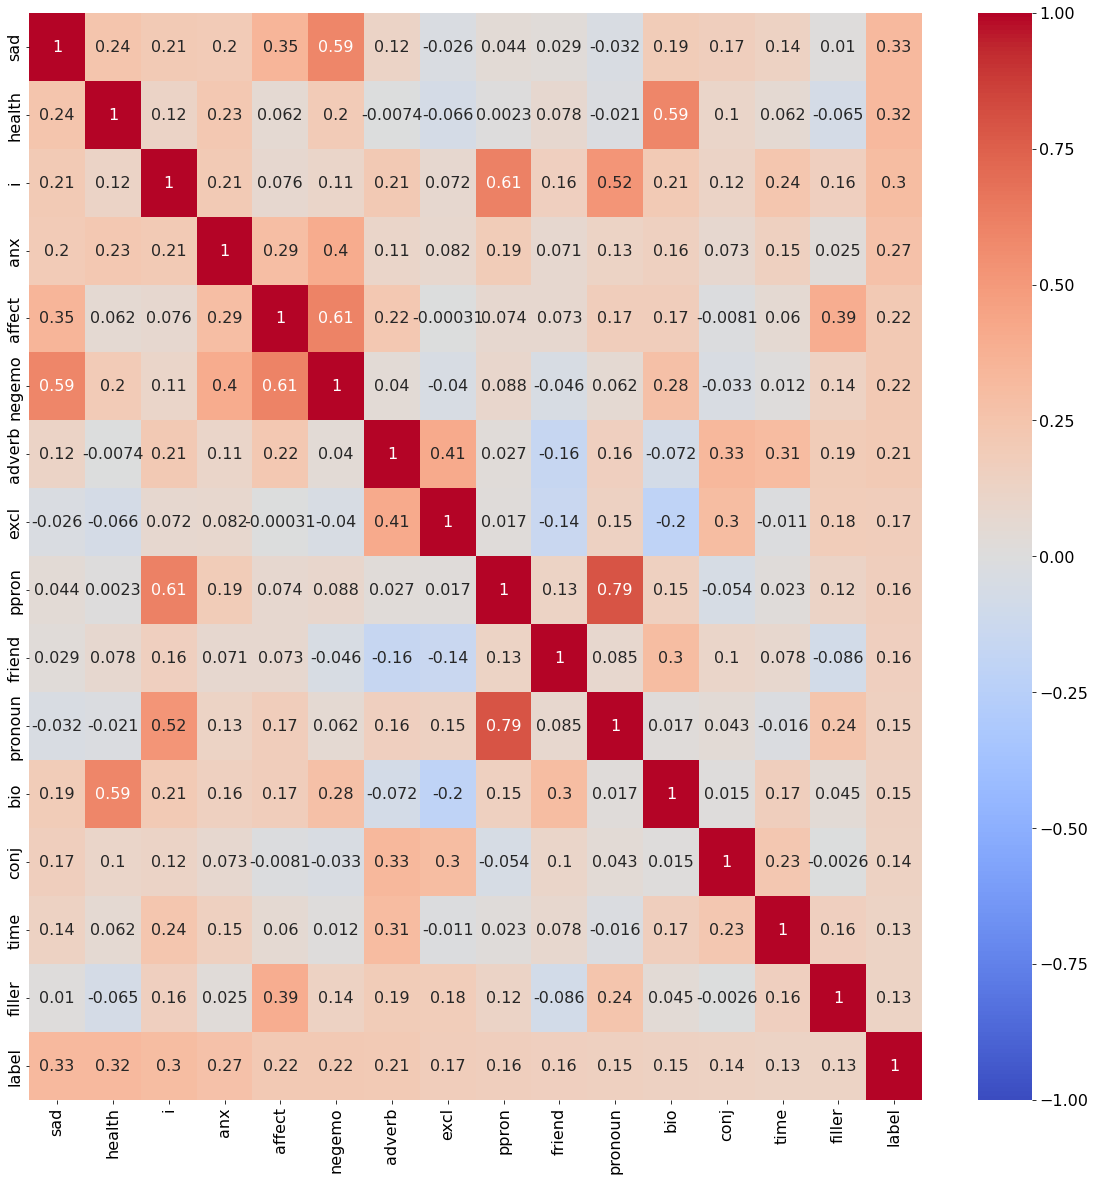

In [30]:
#get the name of top 15 features
liwc_features = list(corr_label.index)
#concat with label
liwc_features.append('label')

plt.figure(figsize=(20,20))

corr_liwc = liwc_percent_df[liwc_features].corr()
sns.heatmap(corr_liwc, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#change only the size of text in axes
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.savefig('/home_remote/liwc_heatmap.pdf')

In [35]:
corr_label_liwc = corr_label
%store corr_label_liwc

Stored 'corr_label_liwc' (Series)
